In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
import re,string
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,LayerNormalization

In [ ]:
df=pd.read_csv('dialogs.txt',sep='\t',names=['question','answer'])
print(f'Dataframe size: {len(df)}')
df.head()

Dataframe size: 3725


,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


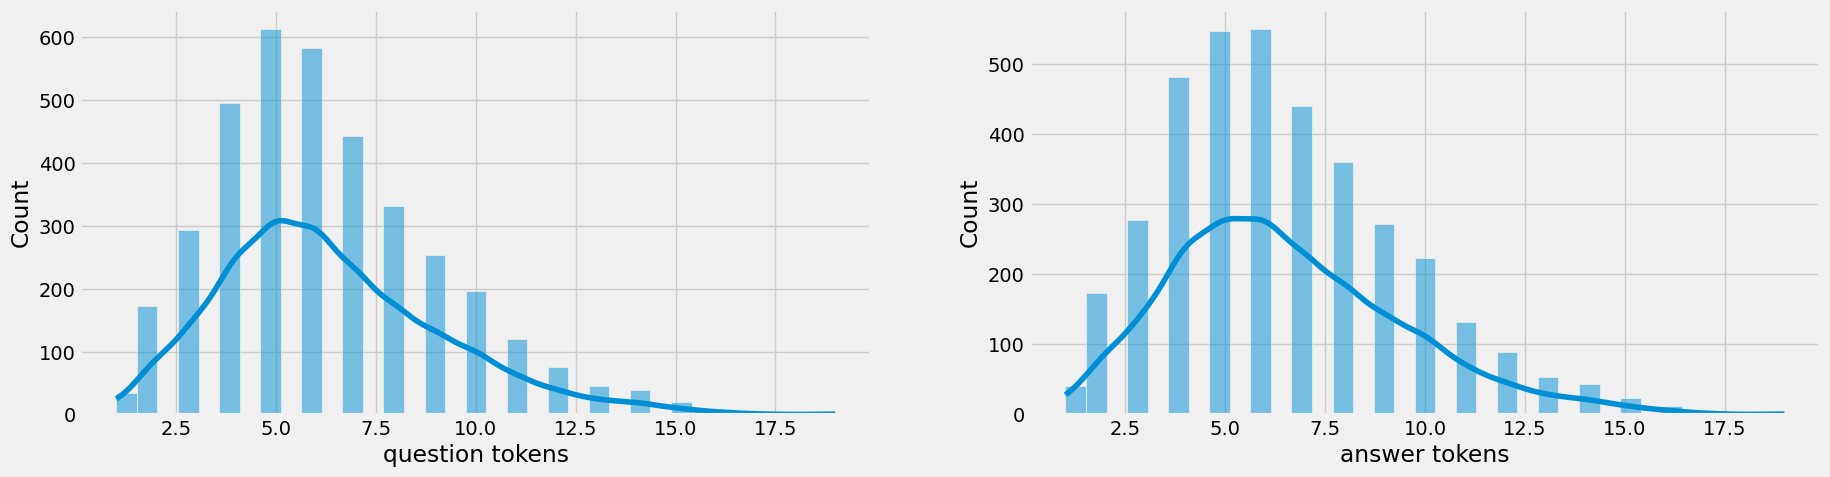

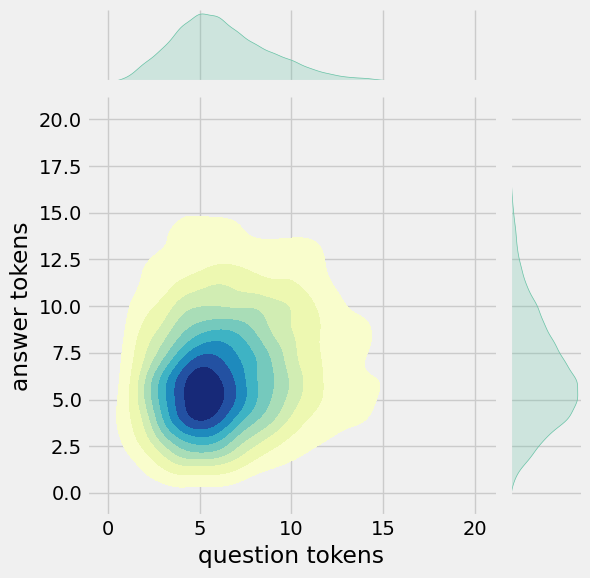

In [ ]:
df['question tokens']=df['question'].apply(lambda x:len(x.split()))
df['answer tokens']=df['answer'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['question tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['answer tokens'],data=df,kde=True,ax=ax[1])
sns.jointplot(x='question tokens',y='answer tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [ ]:
def clean_text(text):
    text=re.sub('-',' ',text.lower())
    text=re.sub('[.]',' . ',text)
    text=re.sub('[1]',' 1 ',text)
    text=re.sub('[2]',' 2 ',text)
    text=re.sub('[3]',' 3 ',text)
    text=re.sub('[4]',' 4 ',text)
    text=re.sub('[5]',' 5 ',text)
    text=re.sub('[6]',' 6 ',text)
    text=re.sub('[7]',' 7 ',text)
    text=re.sub('[8]',' 8 ',text)
    text=re.sub('[9]',' 9 ',text)
    text=re.sub('[0]',' 0 ',text)
    text=re.sub('[,]',' , ',text)
    text=re.sub('[?]',' ? ',text)
    text=re.sub('[!]',' ! ',text)
    text=re.sub('[$]',' $ ',text)
    text=re.sub('[&]',' & ',text)
    text=re.sub('[/]',' / ',text)
    text=re.sub('[:]',' : ',text)
    text=re.sub('[;]',' ; ',text)
    text=re.sub('[*]',' * ',text)
    text=re.sub('[\']',' \' ',text)
    text=re.sub('[\"]',' \" ',text)
    text=re.sub('\t',' ',text)
    return text

df.drop(columns=['answer tokens','question tokens'],axis=1,inplace=True)
df['encoder_inputs']=df['question'].apply(clean_text)
df['decoder_targets']=df['answer'].apply(clean_text)+' <end>'
df['decoder_inputs']='<start> '+df['answer'].apply(clean_text)+' <end>'

df.head(10)

,question,answer,encoder_inputs,decoder_targets,decoder_inputs
0,"hi, how are you doing?",i'm fine. how about yourself?,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem. so how have you been?,i've been great. what about you?,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i've been great. what about you?,i've been good. i'm in school right now.,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i've been good. i'm in school right now.,what school do you go to?,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to?,i go to pcc.,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc.,do you like it there?,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there?,it's okay. it's a really big campus.,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it's okay. it's a really big campus.,good luck with school.,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


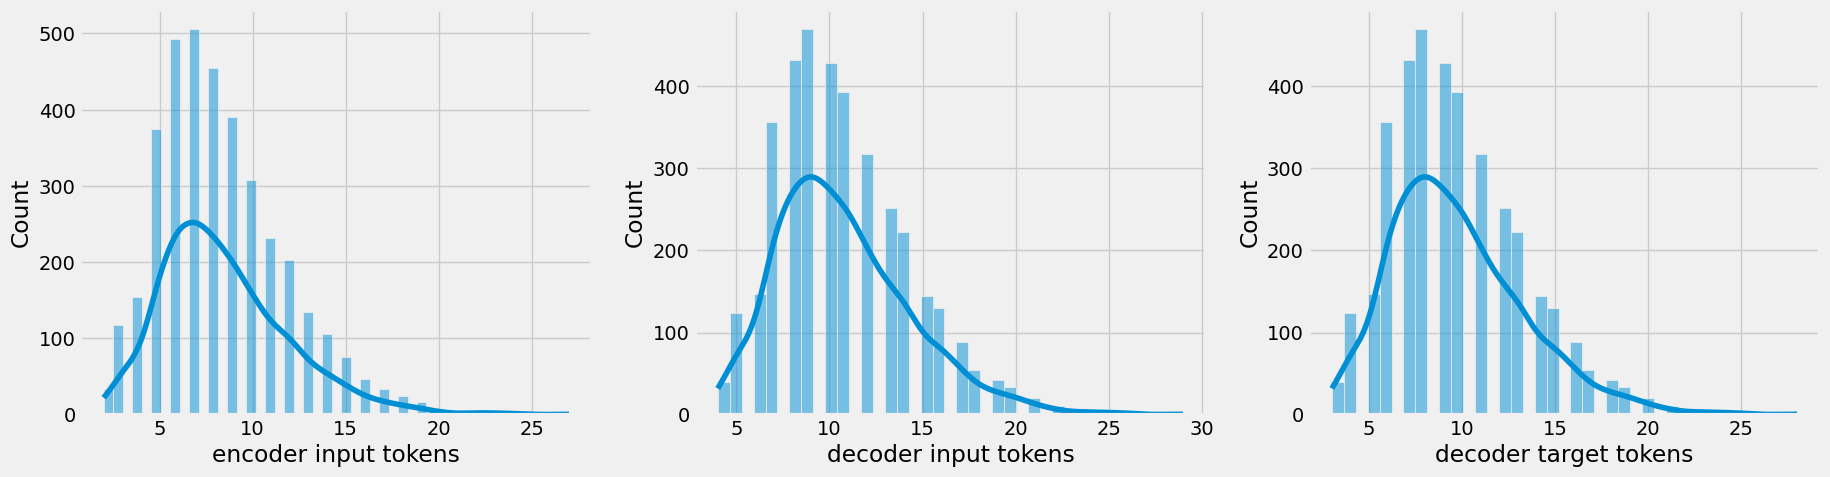

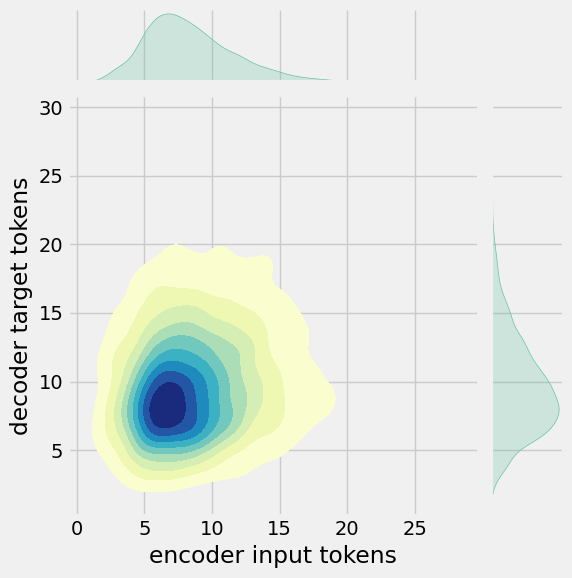

In [ ]:
df['encoder input tokens']=df['encoder_inputs'].apply(lambda x:len(x.split()))
df['decoder input tokens']=df['decoder_inputs'].apply(lambda x:len(x.split()))
df['decoder target tokens']=df['decoder_targets'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['encoder input tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['decoder input tokens'],data=df,kde=True,ax=ax[1])
sns.histplot(x=df['decoder target tokens'],data=df,kde=True,ax=ax[2])
sns.jointplot(x='encoder input tokens',y='decoder target tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [ ]:
print(f"After preprocessing: {' '.join(df[df['encoder input tokens'].max()==df['encoder input tokens']]['encoder_inputs'].values.tolist())}")
print(f"Max encoder input length: {df['encoder input tokens'].max()}")
print(f"Max decoder input length: {df['decoder input tokens'].max()}")
print(f"Max decoder target length: {df['decoder target tokens'].max()}")

df.drop(columns=['question','answer','encoder input tokens','decoder input tokens','decoder target tokens'],axis=1,inplace=True)
params={
    "vocab_size":2500,
    "max_sequence_length":30,
    "learning_rate":0.008,
    "batch_size":149,
    "lstm_cells":256,
    "embedding_dim":256,
    "buffer_size":10000
}
learning_rate=params['learning_rate']
batch_size=params['batch_size']
embedding_dim=params['embedding_dim']
lstm_cells=params['lstm_cells']
vocab_size=params['vocab_size']
buffer_size=params['buffer_size']
max_sequence_length=params['max_sequence_length']
df.head(10)

After preprocessing: for example ,  if your birth date is january  1  2  ,   1  9  8  7  ,  write  0  1  /  1  2  /  8  7  . 
Max encoder input length: 27
Max decoder input length: 29
Max decoder target length: 28


,encoder_inputs,decoder_targets,decoder_inputs
0,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


In [ ]:
vectorize_layer=TextVectorization(
    max_tokens=vocab_size,
    standardize=None,
    output_mode='int',
    output_sequence_length=max_sequence_length
)
vectorize_layer.adapt(df['encoder_inputs']+' '+df['decoder_targets']+' <start> <end>')
vocab_size=len(vectorize_layer.get_vocabulary())
print(f'Vocab size: {len(vectorize_layer.get_vocabulary())}')
print(f'{vectorize_layer.get_vocabulary()[:12]}')

Vocab size: 2443
['', '[UNK]', '<end>', '.', '<start>', "'", 'i', '?', 'you', ',', 'the', 'to']


In [ ]:
def sequences2ids(sequence):
    return vectorize_layer(sequence)

def ids2sequences(ids):
    decode=''
    if type(ids)==int:
        ids=[ids]
    for id in ids:
        decode+=vectorize_layer.get_vocabulary()[id]+' '
    return decode

x=sequences2ids(df['encoder_inputs'])
yd=sequences2ids(df['decoder_inputs'])
y=sequences2ids(df['decoder_targets'])

print(f'Question sentence: hi , how are you ?')
print(f'Question to tokens: {sequences2ids("hi , how are you ?")[:10]}')
print(f'Encoder input shape: {x.shape}')
print(f'Decoder input shape: {yd.shape}')
print(f'Decoder target shape: {y.shape}')

Question sentence: hi , how are you ?
Question to tokens: [1971    9   45   24    8    7    0    0    0    0]
Encoder input shape: (3725, 30)
Decoder input shape: (3725, 30)
Decoder target shape: (3725, 30)


In [ ]:
print(f'Encoder input: {x[0][:12]} ...')
print(f'Decoder input: {yd[0][:12]} ...')    # shifted by one time step of the target as input to decoder is the output of the previous timestep
print(f'Decoder target: {y[0][:12]} ...')

Encoder input: [1971    9   45   24    8  194    7    0    0    0    0    0] ...
Decoder input: [  4   6   5  38 646   3  45  41 563   7   2   0] ...
Decoder target: [  6   5  38 646   3  45  41 563   7   2   0   0] ...


In [ ]:
data=tf.data.Dataset.from_tensor_slices((x,yd,y))
data=data.shuffle(buffer_size)

train_data=data.take(int(.9*len(data)))
train_data=train_data.cache()
train_data=train_data.shuffle(buffer_size)
train_data=train_data.batch(batch_size)
train_data=train_data.prefetch(tf.data.AUTOTUNE)
train_data_iterator=train_data.as_numpy_iterator()

val_data=data.skip(int(.9*len(data))).take(int(.1*len(data)))
val_data=val_data.batch(batch_size)
val_data=val_data.prefetch(tf.data.AUTOTUNE)

_=train_data_iterator.next()
print(f'Number of train batches: {len(train_data)}')
print(f'Number of training data: {len(train_data)*batch_size}')
print(f'Number of validation batches: {len(val_data)}')
print(f'Number of validation data: {len(val_data)*batch_size}')
print(f'Encoder Input shape (with batches): {_[0].shape}')
print(f'Decoder Input shape (with batches): {_[1].shape}')
print(f'Target Output shape (with batches): {_[2].shape}')

Number of train batches: 23
Number of training data: 3427
Number of validation batches: 3
Number of validation data: 447
Encoder Input shape (with batches): (149, 30)
Decoder Input shape (with batches): (149, 30)
Target Output shape (with batches): (149, 30)


In [ ]:
class Encoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.vocab_size=vocab_size
        self.embedding_dim=embedding_dim
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='encoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.GlorotNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='encoder_lstm',
            kernel_initializer=tf.keras.initializers.GlorotNormal()
        )
    
    def call(self,encoder_inputs):
        self.inputs=encoder_inputs
        x=self.embedding(encoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        encoder_outputs,encoder_state_h,encoder_state_c=self.lstm(x)
        self.outputs=[encoder_state_h,encoder_state_c]
        return encoder_state_h,encoder_state_c

encoder=Encoder(lstm_cells,embedding_dim,vocab_size,name='encoder')
encoder.call(_[0])

(<tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 0.06111591,  0.08878364, -0.08446081, ...,  0.03227256,
         -0.08997478,  0.21146189],
        [-0.28193125, -0.27076146,  0.19953133, ..., -0.06283452,
         -0.10668594, -0.01535714],
        [-0.23753622, -0.09567688,  0.10494359, ...,  0.06646045,
          0.05811101,  0.09354451],
        ...,
        [ 0.01849841, -0.01571834,  0.00919481, ...,  0.20017761,
         -0.09963915,  0.11606491],
        [-0.17789096, -0.15721233,  0.26958504, ..., -0.16286068,
          0.04733101,  0.06434676],
        [ 0.00249981, -0.05288697, -0.19552764, ...,  0.09019856,
         -0.00514186,  0.2076852 ]], dtype=float32)>,
 <tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 0.11781497,  0.1640165 , -0.21967743, ...,  0.06620983,
         -0.22829178,  0.33383963],
        [-0.6011324 , -0.5446981 ,  0.29062983, ..., -0.09451559,
         -0.2251306 , -0.03175589],
        [-0.48548993, -0.16790587,  0.15674599,

In [ ]:
class Decoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.embedding_dim=embedding_dim
        self.vocab_size=vocab_size
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='decoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.HeNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='decoder_lstm',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
        self.fc=Dense(
            vocab_size,
            activation='softmax',
            name='decoder_dense',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
    
    def call(self,decoder_inputs,encoder_states):
        x=self.embedding(decoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        x,decoder_state_h,decoder_state_c=self.lstm(x,initial_state=encoder_states)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        return self.fc(x)

decoder=Decoder(lstm_cells,embedding_dim,vocab_size,name='decoder')
decoder(_[1][:1],encoder(_[0][:1]))

<tf.Tensor: shape=(1, 30, 2443), dtype=float32, numpy=
array([[[5.5579859e-04, 8.5909865e-05, 5.3228624e-04, ...,
         2.4847635e-03, 2.2785364e-04, 1.8914210e-04],
        [1.3552023e-03, 3.0998059e-04, 1.0149609e-03, ...,
         1.5640222e-04, 3.7997967e-04, 1.5821973e-04],
        [1.8258765e-04, 6.3030115e-05, 9.0186676e-04, ...,
         8.1450783e-04, 1.1286892e-03, 1.1633487e-04],
        ...,
        [9.4563096e-05, 7.2012946e-05, 3.1278419e-04, ...,
         4.5664648e-05, 2.4818015e-04, 1.0744838e-05],
        [9.4563096e-05, 7.2012946e-05, 3.1278419e-04, ...,
         4.5664648e-05, 2.4818015e-04, 1.0744838e-05],
        [9.4563096e-05, 7.2012946e-05, 3.1278419e-04, ...,
         4.5664648e-05, 2.4818015e-04, 1.0744838e-05]]], dtype=float32)>

In [ ]:
class ChatBotTrainer(tf.keras.models.Model):
    def __init__(self,encoder,decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder=encoder
        self.decoder=decoder

    def loss_fn(self,y_true,y_pred):
        loss=self.loss(y_true,y_pred)
        mask=tf.math.logical_not(tf.math.equal(y_true,0))
        mask=tf.cast(mask,dtype=loss.dtype)
        loss*=mask
        return tf.reduce_mean(loss)
    
    def accuracy_fn(self,y_true,y_pred):
        pred_values = tf.cast(tf.argmax(y_pred, axis=-1), dtype='int64')
        correct = tf.cast(tf.equal(y_true, pred_values), dtype='float64')
        mask = tf.cast(tf.greater(y_true, 0), dtype='float64')
        n_correct = tf.keras.backend.sum(mask * correct)
        n_total = tf.keras.backend.sum(mask)
        return n_correct / n_total

    def call(self,inputs):
        encoder_inputs,decoder_inputs=inputs
        encoder_states=self.encoder(encoder_inputs)
        return self.decoder(decoder_inputs,encoder_states)

    def train_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        with tf.GradientTape() as tape:
            encoder_states=self.encoder(encoder_inputs,training=True)
            y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
            loss=self.loss_fn(y,y_pred)
            acc=self.accuracy_fn(y,y_pred)

        variables=self.encoder.trainable_variables+self.decoder.trainable_variables
        grads=tape.gradient(loss,variables)
        self.optimizer.apply_gradients(zip(grads,variables))
        metrics={'loss':loss,'accuracy':acc}
        return metrics
    
    def test_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        encoder_states=self.encoder(encoder_inputs,training=True)
        y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
        loss=self.loss_fn(y,y_pred)
        acc=self.accuracy_fn(y,y_pred)
        metrics={'loss':loss,'accuracy':acc}
        return metrics


In [ ]:
model=ChatBotTrainer(encoder,decoder,name='chatbot_trainer')
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    weighted_metrics=['loss','accuracy']
)
model(_[:2])

<tf.Tensor: shape=(149, 30, 2443), dtype=float32, numpy=
array([[[5.55798877e-04, 8.59098363e-05, 5.32286009e-04, ...,
         2.48476514e-03, 2.27853772e-04, 1.89142113e-04],
        [1.35520275e-03, 3.09980242e-04, 1.01496081e-03, ...,
         1.56402195e-04, 3.79979610e-04, 1.58219787e-04],
        [1.82587843e-04, 6.30301220e-05, 9.01865948e-04, ...,
         8.14508297e-04, 1.12868950e-03, 1.16334886e-04],
        ...,
        [9.45631618e-05, 7.20130338e-05, 3.12784396e-04, ...,
         4.56646994e-05, 2.48180208e-04, 1.07448504e-05],
        [9.45631618e-05, 7.20130338e-05, 3.12784396e-04, ...,
         4.56646994e-05, 2.48180208e-04, 1.07448504e-05],
        [9.45631618e-05, 7.20130338e-05, 3.12784396e-04, ...,
         4.56646994e-05, 2.48180208e-04, 1.07448495e-05]],

       [[1.21153491e-04, 8.70113799e-05, 1.07295622e-04, ...,
         7.57427886e-04, 2.16055894e-04, 2.25761905e-04],
        [4.26490406e-05, 7.50760519e-05, 1.50750129e-04, ...,
         8.89028961e-05, 5

In [ ]:
history=model.fit(
    train_data,
    epochs=100,
    validation_data=val_data,
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        tf.keras.callbacks.ModelCheckpoint('ckpt',verbose=1,save_best_only=True)
    ]
)

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 1.6649 - accuracy: 0.2189
Epoch 1: val_loss improved from inf to 1.26097, saving model to ckpt


23/23 [==============================] - 119s 4s/step - loss: 1.6586 - accuracy: 0.2208 - val_loss: 1.2610 - val_accuracy: 0.3092
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 1.2352 - accuracy: 0.3098
Epoch 2: val_loss improved from 1.26097 to 1.14211, saving model to ckpt


23/23 [==============================] - 98s 4s/step - loss: 1.2351 - accuracy: 0.3113 - val_loss: 1.1421 - val_accuracy: 0.3329
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3401
Epoch 3: val_loss improved from 1.14211 to 1.06733, saving model to ckpt


23/23 [==============================] - 104s 5s/step - loss: 1.0974 - accuracy: 0.3407 - val_loss: 1.0673 - val_accuracy: 0.3370
Epoch 4/100
23/23 [==============================] - ETA: 0s - loss: 1.0185 - accuracy: 0.3560
Epoch 4: val_loss improved from 1.06733 to 1.03779, saving model to ckpt


23/23 [==============================] - 111s 5s/step - loss: 1.0142 - accuracy: 0.3567 - val_loss: 1.0378 - val_accuracy: 0.3889
Epoch 5/100
23/23 [==============================] - ETA: 0s - loss: 0.9609 - accuracy: 0.3709
Epoch 5: val_loss improved from 1.03779 to 0.89424, saving model to ckpt


23/23 [==============================] - 86s 4s/step - loss: 0.9615 - accuracy: 0.3711 - val_loss: 0.8942 - val_accuracy: 0.3953
Epoch 6/100
23/23 [==============================] - ETA: 0s - loss: 0.9148 - accuracy: 0.3808
Epoch 6: val_loss did not improve from 0.89424
23/23 [==============================] - 56s 2s/step - loss: 0.9182 - accuracy: 0.3796 - val_loss: 0.9833 - val_accuracy: 0.3693
Epoch 7/100
23/23 [==============================] - ETA: 0s - loss: 0.8727 - accuracy: 0.3905
Epoch 7: val_loss did not improve from 0.89424
23/23 [==============================] - 54s 2s/step - loss: 0.8699 - accuracy: 0.3916 - val_loss: 0.9911 - val_accuracy: 0.3811
Epoch 8/100
23/23 [==============================] - ETA: 0s - loss: 0.8367 - accuracy: 0.4014
Epoch 8: val_loss improved from 0.89424 to 0.88840, saving model to ckpt


23/23 [==============================] - 95s 4s/step - loss: 0.8358 - accuracy: 0.4015 - val_loss: 0.8884 - val_accuracy: 0.3875
Epoch 9/100
23/23 [==============================] - ETA: 0s - loss: 0.8105 - accuracy: 0.4111
Epoch 9: val_loss improved from 0.88840 to 0.77639, saving model to ckpt


23/23 [==============================] - 88s 4s/step - loss: 0.8115 - accuracy: 0.4100 - val_loss: 0.7764 - val_accuracy: 0.4084
Epoch 10/100
23/23 [==============================] - ETA: 0s - loss: 0.7839 - accuracy: 0.4222
Epoch 10: val_loss did not improve from 0.77639
23/23 [==============================] - 48s 2s/step - loss: 0.7820 - accuracy: 0.4219 - val_loss: 0.7772 - val_accuracy: 0.4284
Epoch 11/100
23/23 [==============================] - ETA: 0s - loss: 0.7624 - accuracy: 0.4289
Epoch 11: val_loss improved from 0.77639 to 0.76471, saving model to ckpt


23/23 [==============================] - 95s 4s/step - loss: 0.7638 - accuracy: 0.4277 - val_loss: 0.7647 - val_accuracy: 0.3897
Epoch 12/100
23/23 [==============================] - ETA: 0s - loss: 0.7409 - accuracy: 0.4401
Epoch 12: val_loss improved from 0.76471 to 0.67871, saving model to ckpt


23/23 [==============================] - 94s 4s/step - loss: 0.7395 - accuracy: 0.4402 - val_loss: 0.6787 - val_accuracy: 0.4632
Epoch 13/100
23/23 [==============================] - ETA: 0s - loss: 0.7238 - accuracy: 0.4439
Epoch 13: val_loss did not improve from 0.67871
23/23 [==============================] - 54s 2s/step - loss: 0.7238 - accuracy: 0.4435 - val_loss: 0.7899 - val_accuracy: 0.4541
Epoch 14/100
23/23 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.4550
Epoch 14: val_loss did not improve from 0.67871
23/23 [==============================] - 52s 2s/step - loss: 0.7011 - accuracy: 0.4559 - val_loss: 0.6989 - val_accuracy: 0.4754
Epoch 15/100
23/23 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.4642
Epoch 15: val_loss did not improve from 0.67871
23/23 [==============================] - 51s 2s/step - loss: 0.6859 - accuracy: 0.4636 - val_loss: 0.7481 - val_accuracy: 0.4536
Epoch 16/100
23/23 [==============================] 

23/23 [==============================] - 99s 4s/step - loss: 0.6756 - accuracy: 0.4704 - val_loss: 0.6356 - val_accuracy: 0.4902
Epoch 17/100
23/23 [==============================] - ETA: 0s - loss: 0.6599 - accuracy: 0.4788
Epoch 17: val_loss did not improve from 0.63557
23/23 [==============================] - 47s 2s/step - loss: 0.6612 - accuracy: 0.4783 - val_loss: 0.6653 - val_accuracy: 0.4993
Epoch 18/100
23/23 [==============================] - ETA: 0s - loss: 0.6473 - accuracy: 0.4803
Epoch 18: val_loss improved from 0.63557 to 0.60075, saving model to ckpt


23/23 [==============================] - 96s 4s/step - loss: 0.6480 - accuracy: 0.4791 - val_loss: 0.6007 - val_accuracy: 0.5079
Epoch 19/100
23/23 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.4893
Epoch 19: val_loss did not improve from 0.60075
23/23 [==============================] - 52s 2s/step - loss: 0.6407 - accuracy: 0.4884 - val_loss: 0.8120 - val_accuracy: 0.4575
Epoch 20/100
23/23 [==============================] - ETA: 0s - loss: 0.6229 - accuracy: 0.4958
Epoch 20: val_loss did not improve from 0.60075
23/23 [==============================] - 55s 2s/step - loss: 0.6240 - accuracy: 0.4956 - val_loss: 0.6982 - val_accuracy: 0.4694
Epoch 21/100
23/23 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.4992
Epoch 21: val_loss did not improve from 0.60075
23/23 [==============================] - 57s 3s/step - loss: 0.6155 - accuracy: 0.4981 - val_loss: 0.7017 - val_accuracy: 0.4830
Epoch 22/100
23/23 [==============================] 

23/23 [==============================] - 90s 4s/step - loss: 0.5834 - accuracy: 0.5179 - val_loss: 0.4899 - val_accuracy: 0.5488
Epoch 25/100
23/23 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.5252
Epoch 25: val_loss did not improve from 0.48988
23/23 [==============================] - 51s 2s/step - loss: 0.5703 - accuracy: 0.5253 - val_loss: 0.7014 - val_accuracy: 0.5014
Epoch 26/100
23/23 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.5259
Epoch 26: val_loss did not improve from 0.48988
23/23 [==============================] - 57s 2s/step - loss: 0.5632 - accuracy: 0.5253 - val_loss: 0.6396 - val_accuracy: 0.5254
Epoch 27/100
23/23 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.5309
Epoch 27: val_loss did not improve from 0.48988
23/23 [==============================] - 54s 2s/step - loss: 0.5564 - accuracy: 0.5314 - val_loss: 0.5959 - val_accuracy: 0.5310
Epoch 28/100
23/23 [==============================] 

23/23 [==============================] - 70s 3s/step - loss: 0.4830 - accuracy: 0.5782 - val_loss: 0.4628 - val_accuracy: 0.5790
Epoch 41/100
23/23 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.5817
Epoch 41: val_loss did not improve from 0.46281
23/23 [==============================] - 47s 2s/step - loss: 0.4770 - accuracy: 0.5801 - val_loss: 0.6346 - val_accuracy: 0.5224
Epoch 42/100
23/23 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.5870
Epoch 42: val_loss did not improve from 0.46281
23/23 [==============================] - 39s 2s/step - loss: 0.4698 - accuracy: 0.5860 - val_loss: 0.5406 - val_accuracy: 0.5510
Epoch 43/100
23/23 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.5839
Epoch 43: val_loss did not improve from 0.46281
23/23 [==============================] - 39s 2s/step - loss: 0.4684 - accuracy: 0.5838 - val_loss: 0.5249 - val_accuracy: 0.5757
Epoch 44/100
23/23 [==============================] 

23/23 [==============================] - 72s 3s/step - loss: 0.4261 - accuracy: 0.6154 - val_loss: 0.4619 - val_accuracy: 0.6043
Epoch 55/100
23/23 [==============================] - ETA: 0s - loss: 0.4194 - accuracy: 0.6179
Epoch 55: val_loss did not improve from 0.46188
23/23 [==============================] - 41s 2s/step - loss: 0.4177 - accuracy: 0.6190 - val_loss: 0.5439 - val_accuracy: 0.5884
Epoch 56/100
23/23 [==============================] - ETA: 0s - loss: 0.4164 - accuracy: 0.6207
Epoch 56: val_loss did not improve from 0.46188
23/23 [==============================] - 41s 2s/step - loss: 0.4155 - accuracy: 0.6206 - val_loss: 0.5076 - val_accuracy: 0.5736
Epoch 57/100
23/23 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.6255
Epoch 57: val_loss did not improve from 0.46188
23/23 [==============================] - 39s 2s/step - loss: 0.4127 - accuracy: 0.6258 - val_loss: 0.4919 - val_accuracy: 0.6110
Epoch 58/100
23/23 [==============================] 

23/23 [==============================] - 72s 3s/step - loss: 0.4037 - accuracy: 0.6318 - val_loss: 0.4216 - val_accuracy: 0.6183
Epoch 62/100
23/23 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.6270
Epoch 62: val_loss did not improve from 0.42156
23/23 [==============================] - 40s 2s/step - loss: 0.4064 - accuracy: 0.6266 - val_loss: 0.4417 - val_accuracy: 0.6254
Epoch 63/100
23/23 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.6335
Epoch 63: val_loss did not improve from 0.42156
23/23 [==============================] - 40s 2s/step - loss: 0.4000 - accuracy: 0.6318 - val_loss: 0.4936 - val_accuracy: 0.6124
Epoch 64/100
23/23 [==============================] - ETA: 0s - loss: 0.3984 - accuracy: 0.6338
Epoch 64: val_loss improved from 0.42156 to 0.41529, saving model to ckpt


23/23 [==============================] - 71s 3s/step - loss: 0.3996 - accuracy: 0.6337 - val_loss: 0.4153 - val_accuracy: 0.6324
Epoch 65/100
23/23 [==============================] - ETA: 0s - loss: 0.3969 - accuracy: 0.6355
Epoch 65: val_loss did not improve from 0.41529
23/23 [==============================] - 41s 2s/step - loss: 0.3973 - accuracy: 0.6352 - val_loss: 0.5048 - val_accuracy: 0.6212
Epoch 66/100
23/23 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.6400
Epoch 66: val_loss did not improve from 0.41529
23/23 [==============================] - 41s 2s/step - loss: 0.3879 - accuracy: 0.6404 - val_loss: 0.4625 - val_accuracy: 0.6272
Epoch 67/100
23/23 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.6442
Epoch 67: val_loss did not improve from 0.41529
23/23 [==============================] - 40s 2s/step - loss: 0.3928 - accuracy: 0.6441 - val_loss: 0.5406 - val_accuracy: 0.5956
Epoch 68/100
23/23 [==============================] 

23/23 [==============================] - 73s 3s/step - loss: 0.3833 - accuracy: 0.6465 - val_loss: 0.4112 - val_accuracy: 0.6555
Epoch 72/100
23/23 [==============================] - ETA: 0s - loss: 0.3768 - accuracy: 0.6517
Epoch 72: val_loss did not improve from 0.41115
23/23 [==============================] - 40s 2s/step - loss: 0.3788 - accuracy: 0.6504 - val_loss: 0.4783 - val_accuracy: 0.6198
Epoch 73/100
23/23 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.6499
Epoch 73: val_loss did not improve from 0.41115
23/23 [==============================] - 41s 2s/step - loss: 0.3783 - accuracy: 0.6485 - val_loss: 0.5044 - val_accuracy: 0.6116
Epoch 74/100
23/23 [==============================] - ETA: 0s - loss: 0.3749 - accuracy: 0.6530
Epoch 74: val_loss did not improve from 0.41115
23/23 [==============================] - 40s 2s/step - loss: 0.3753 - accuracy: 0.6531 - val_loss: 0.4314 - val_accuracy: 0.6341
Epoch 75/100
23/23 [==============================] 

23/23 [==============================] - 72s 3s/step - loss: 0.3611 - accuracy: 0.6628 - val_loss: 0.3927 - val_accuracy: 0.6461
Epoch 85/100
23/23 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.6681
Epoch 85: val_loss did not improve from 0.39271
23/23 [==============================] - 39s 2s/step - loss: 0.3526 - accuracy: 0.6673 - val_loss: 0.4120 - val_accuracy: 0.6493
Epoch 86/100
23/23 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.6705
Epoch 86: val_loss did not improve from 0.39271
23/23 [==============================] - 41s 2s/step - loss: 0.3524 - accuracy: 0.6701 - val_loss: 0.5391 - val_accuracy: 0.6602
Epoch 87/100
23/23 [==============================] - ETA: 0s - loss: 0.3477 - accuracy: 0.6731
Epoch 87: val_loss did not improve from 0.39271
23/23 [==============================] - 40s 2s/step - loss: 0.3490 - accuracy: 0.6723 - val_loss: 0.5085 - val_accuracy: 0.5907
Epoch 88/100
23/23 [==============================] 

23/23 [==============================] - 69s 3s/step - loss: 0.3385 - accuracy: 0.6805 - val_loss: 0.3866 - val_accuracy: 0.6775
Epoch 96/100
23/23 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.6800
Epoch 96: val_loss did not improve from 0.38658
23/23 [==============================] - 39s 2s/step - loss: 0.3375 - accuracy: 0.6794 - val_loss: 0.4793 - val_accuracy: 0.6446
Epoch 97/100
23/23 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.6822
Epoch 97: val_loss did not improve from 0.38658
23/23 [==============================] - 39s 2s/step - loss: 0.3342 - accuracy: 0.6825 - val_loss: 0.4117 - val_accuracy: 0.6399
Epoch 98/100
23/23 [==============================] - ETA: 0s - loss: 0.3338 - accuracy: 0.6813
Epoch 98: val_loss did not improve from 0.38658
23/23 [==============================] - 39s 2s/step - loss: 0.3310 - accuracy: 0.6823 - val_loss: 0.4619 - val_accuracy: 0.6504
Epoch 99/100
23/23 [==============================] 

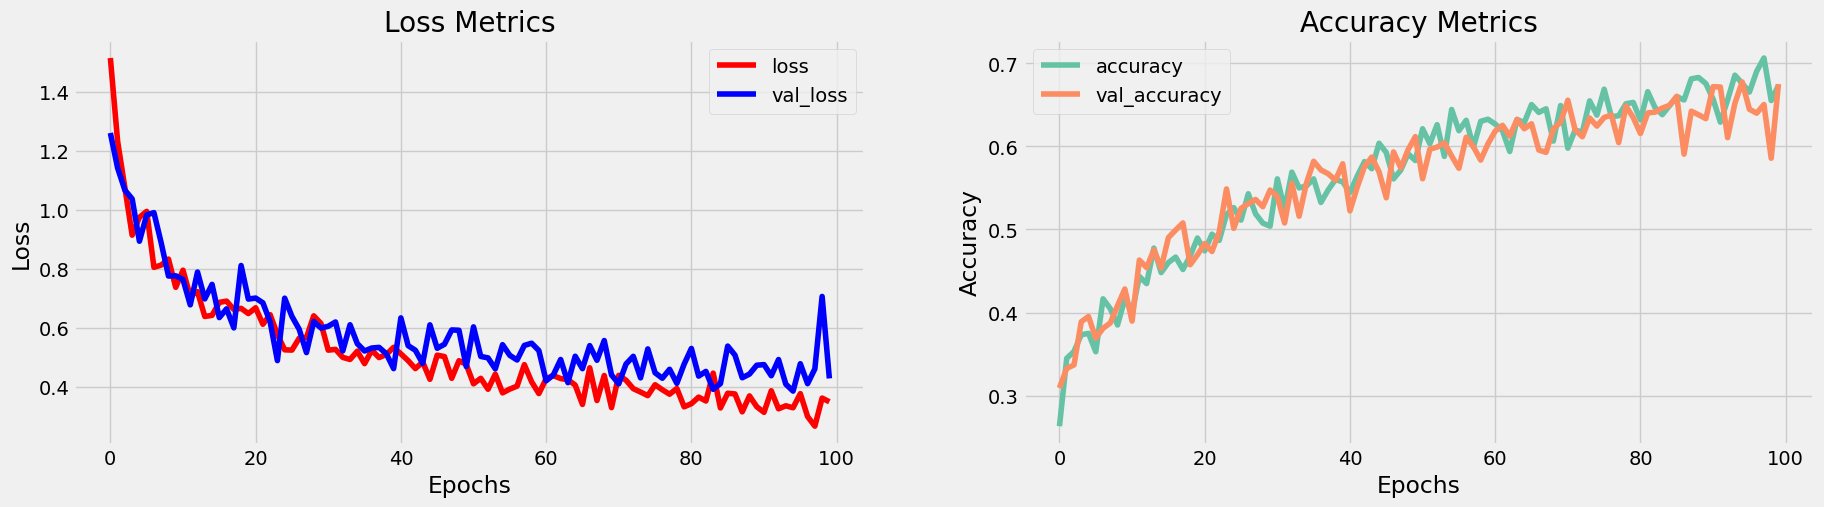

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax[0].plot(history.history['loss'],label='loss',c='red')
ax[0].plot(history.history['val_loss'],label='val_loss',c = 'blue')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[0].set_title('Loss Metrics')
ax[1].set_title('Accuracy Metrics')
ax[1].plot(history.history['accuracy'],label='accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
model.load_weights('ckpt')
model.save('models',save_format='tf')

In [ ]:
for idx,i in enumerate(model.layers):
    print('Encoder layers:' if idx==0 else 'Decoder layers: ')
    for j in i.layers:
        print(j)
    print('---------------------')

Encoder layers:
---------------------
Decoder layers: 
---------------------


In [ ]:
class ChatBot(tf.keras.models.Model):
    def __init__(self,base_encoder,base_decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder,self.decoder=self.build_inference_model(base_encoder,base_decoder)

    def build_inference_model(self,base_encoder,base_decoder):
        encoder_inputs=tf.keras.Input(shape=(None,))
        x=base_encoder.layers[0](encoder_inputs)
        x=base_encoder.layers[1](x)
        x,encoder_state_h,encoder_state_c=base_encoder.layers[2](x)
        encoder=tf.keras.models.Model(inputs=encoder_inputs,outputs=[encoder_state_h,encoder_state_c],name='chatbot_encoder')

        decoder_input_state_h=tf.keras.Input(shape=(lstm_cells,))
        decoder_input_state_c=tf.keras.Input(shape=(lstm_cells,))
        decoder_inputs=tf.keras.Input(shape=(None,))
        x=base_decoder.layers[0](decoder_inputs)
        x=base_encoder.layers[1](x)
        x,decoder_state_h,decoder_state_c=base_decoder.layers[2](x,initial_state=[decoder_input_state_h,decoder_input_state_c])
        decoder_outputs=base_decoder.layers[-1](x)
        decoder=tf.keras.models.Model(
            inputs=[decoder_inputs,[decoder_input_state_h,decoder_input_state_c]],
            outputs=[decoder_outputs,[decoder_state_h,decoder_state_c]],name='chatbot_decoder'
        )
        return encoder,decoder

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

    def softmax(self,z):
        return np.exp(z)/sum(np.exp(z))

    def sample(self,conditional_probability,temperature=0.5):
        conditional_probability = np.asarray(conditional_probability).astype("float64")
        conditional_probability = np.log(conditional_probability) / temperature
        reweighted_conditional_probability = self.softmax(conditional_probability)
        probas = np.random.multinomial(1, reweighted_conditional_probability, 1)
        return np.argmax(probas)

    def preprocess(self,text):
        text=clean_text(text)
        seq=np.zeros((1,max_sequence_length),dtype=np.int32)
        for i,word in enumerate(text.split()):
            seq[:,i]=sequences2ids(word).numpy()[0]
        return seq
    
    def postprocess(self,text):
        text=re.sub(' - ','-',text.lower())
        text=re.sub(' [.] ','. ',text)
        text=re.sub(' [1] ','1',text)
        text=re.sub(' [2] ','2',text)
        text=re.sub(' [3] ','3',text)
        text=re.sub(' [4] ','4',text)
        text=re.sub(' [5] ','5',text)
        text=re.sub(' [6] ','6',text)
        text=re.sub(' [7] ','7',text)
        text=re.sub(' [8] ','8',text)
        text=re.sub(' [9] ','9',text)
        text=re.sub(' [0] ','0',text)
        text=re.sub(' [,] ',', ',text)
        text=re.sub(' [?] ','? ',text)
        text=re.sub(' [!] ','! ',text)
        text=re.sub(' [$] ','$ ',text)
        text=re.sub(' [&] ','& ',text)
        text=re.sub(' [/] ','/ ',text)
        text=re.sub(' [:] ',': ',text)
        text=re.sub(' [;] ','; ',text)
        text=re.sub(' [*] ','* ',text)
        text=re.sub(' [\'] ','\'',text)
        text=re.sub(' [\"] ','\"',text)
        return text

    def call(self,text,config=None):
        input_seq=self.preprocess(text)
        states=self.encoder(input_seq,training=False)
        target_seq=np.zeros((1,1))
        target_seq[:,:]=sequences2ids(['<start>']).numpy()[0][0]
        stop_condition=False
        decoded=[]
        while not stop_condition:
            decoder_outputs,new_states=self.decoder([target_seq,states],training=False)
#             index=tf.argmax(decoder_outputs[:,-1,:],axis=-1).numpy().item()
            index=self.sample(decoder_outputs[0,0,:]).item()
            word=ids2sequences([index])
            if word=='<end> ' or len(decoded)>=max_sequence_length:
                stop_condition=True
            else:
                decoded.append(index)
                target_seq=np.zeros((1,1))
                target_seq[:,:]=index
                states=new_states
        return self.postprocess(ids2sequences(decoded))

chatbot=ChatBot(model.encoder,model.decoder,name='chatbot')
chatbot.summary()

Model: "chatbot_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 encoder_embedding (Embeddin  (None, None, 256)        625408    
 g)                                                              
                                                                 
 layer_normalization_2 (Laye  (None, None, 256)        512       
 rNormalization)                                                 
                                                                 
 encoder_lstm (LSTM)         [(None, None, 256),       525312    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 1,151,232
Trainable params: 1,151,232

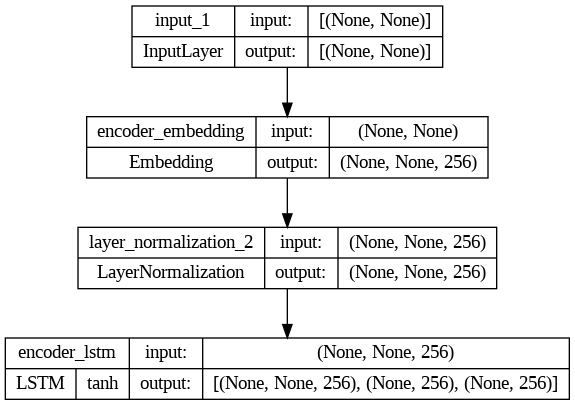

In [ ]:
tf.keras.utils.plot_model(chatbot.encoder,to_file='encoder.png',show_shapes=True,show_layer_activations=True)

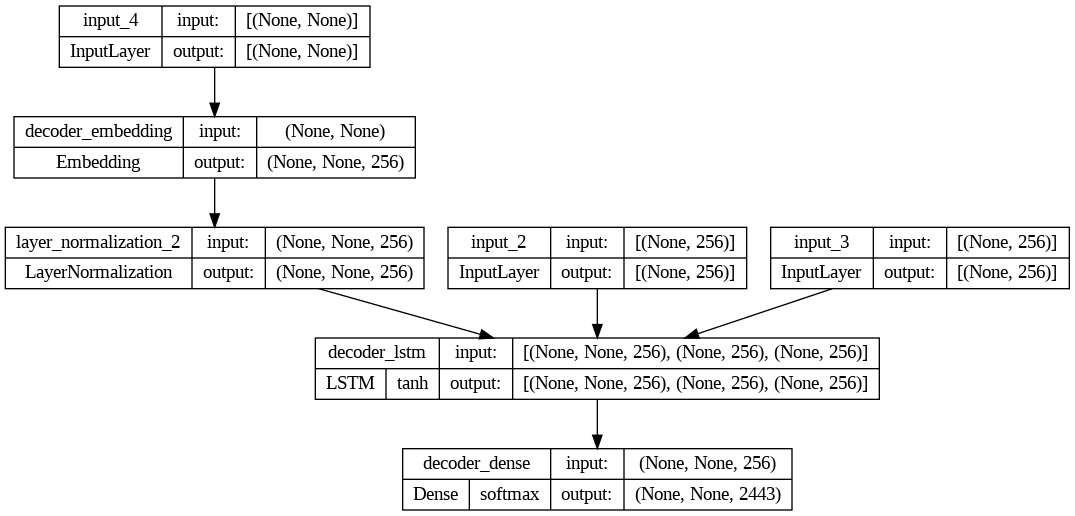

In [ ]:
tf.keras.utils.plot_model(chatbot.decoder,to_file='decoder.png',show_shapes=True,show_layer_activations=True)

In [ ]:
def print_conversation(texts):
    for text in texts:
        print(f'You: {text}')
        print(f'Bot: {chatbot(text)}')
        print('========================')

In [ ]:
print_conversation([
    'hi',
])

You: hi
Bot: yikes. 
You: do yo know me?
Bot: oh, of course i'll. 
You: what is your name?
Bot: it's the automatic teller machine. 
You: you are bot?
Bot: no, i don't. 
